<a href="https://colab.research.google.com/github/aabioumaima/Accuracy-Precision-Recall-and-F1-Score/blob/main/TPrecapDataScience_AABI_Oumaima_MISC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AABI Oumaima, MIASC2**

**TP de Data Science ING3 Informatique EILCO**
**Ce TP permet de tester votre capacité à avoir assimiler les élements de base de l'analyse de données par des techniques de data science ainsi que l'élaboration et le test d'un modèle prédictif utilisant les techniques de ML. Vous devez le réaliser  en individuel et le faire partager avec votre en enseignant en google drive pour la fin de la séance. **


1) En utilisant pandas récupérer,  dans un data frame, Récupérer le fichier csv se trouvant à l'adresse suivante : http://math.univ-lyon1.fr/~gciuperca/data_sommeil.csv.

**Attention dans ce fichier le séparateur est un ";" et non une ",".**

In [116]:
#Importer les librariries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
import numpy as np

In [117]:
df = pd.read_csv('http://math.univ-lyon1.fr/~gciuperca/data_sommeil.csv', sep = ';')
df.head()

,IDEN,AGE,POIDS,TAILLE,ALCOOL,SEXE,INSOMNIE,TABAC,ECRAN
0,ID_001,47,71,158,0,0,0,1,0.50
1,ID_002,56,58,164,7,0,1,0,1.25
2,id_003,46,116,208,3,0,0,1,1.75
3,ID_004,70,96,186,3,0,0,1,1.00
4,ID_005,51,91,195,2,0,1,1,1.75


2) Afficher les 20 premières lignes du data frame 

In [118]:
df.head(20)

,IDEN,AGE,POIDS,TAILLE,ALCOOL,SEXE,INSOMNIE,TABAC,ECRAN
0,ID_001,47,71,158,0,0,0,1,0.50
1,ID_002,56,58,164,7,0,1,0,1.25
2,id_003,46,116,208,3,0,0,1,1.75
3,ID_004,70,96,186,3,0,0,1,1.00
4,ID_005,51,91,195,2,0,1,1,1.75
5,ID_006,46,98,188,0,1,0,0,3.25
6,ID_007,40,112,193,5,0,0,1,3.75
7,id_008,46,77,165,0,1,0,0,1.25
8,ID_009,49,76,164,0,0,0,0,0.75
9,ID_010,39,119,196,3,0,0,0,0.75


3)Afficher les types des différentes colonnes du dataframe


In [119]:
df.dtypes

IDEN         object
AGE           int64
POIDS         int64
TAILLE        int64
ALCOOL        int64
SEXE          int64
INSOMNIE      int64
TABAC         int64
ECRAN       float64
dtype: object


4) Discretisez les valeurs des colones Age, Poids et ecran. Pour cela vous devez créer  trois nouvelles colonnes qu'on appellera respectivemebt : AGEQ, ¨POIDSQ et ECRANQ. On veut trois catégories d'age, trois catégories de poids et 4 catégories d'ecrans.


In [120]:
df["AGEQ"]=pd.qcut(df.AGE,3,labels=["Age1","Age2","Age3"])
df["POIDSQ"]=pd.qcut(df.POIDS,3,labels=["Poids1","Poids2","Poids3"])
df["ECRANQ"]=pd.qcut(df.ECRAN,4,labels=["Ecran1","Ecran2","Ecran3", "Ecran4"])
df.head()

,IDEN,AGE,POIDS,TAILLE,ALCOOL,SEXE,INSOMNIE,TABAC,ECRAN,AGEQ,POIDSQ,ECRANQ
0,ID_001,47,71,158,0,0,0,1,0.50,Age2,Poids1,Ecran1
1,ID_002,56,58,164,7,0,1,0,1.25,Age2,Poids1,Ecran2
2,id_003,46,116,208,3,0,0,1,1.75,Age1,Poids3,Ecran2
3,ID_004,70,96,186,3,0,0,1,1.00,Age3,Poids2,Ecran1
4,ID_005,51,91,195,2,0,1,1,1.75,Age2,Poids2,Ecran2


5) Afficher la distribution statistique  des valeurs pour une des trois colonnes que vous venez de créer: nombre de valeurs, nombre de valeurs uniques, la valeur la plus représentée, etc. 

In [121]:
df['AGEQ'].describe()

count      100
unique       3
top       Age1
freq        37
Name: AGEQ, dtype: object

6)En réalité nous voudrions que tous les champs (sauf le champ IDEN) soient des catégories. Nous aimerions également que les catégories Age, Taille, Poids, Alcool et ECRAN soient ordinales. Ecrire le code pour ce faire puis afficher les nouveaux types ainsi obtenus.

In [122]:
df["AGE"] = pd.Categorical(df["AGE"],ordered = True)
df["TAILLE"] = pd.Categorical(df["TAILLE"],ordered = True)
df["POIDS"] = pd.Categorical(df["POIDS"],ordered = True)
df["ALCOOL"] = pd.Categorical(df["ALCOOL"],ordered = True)
df["ECRAN"] = pd.Categorical(df["ECRAN"],ordered = True)
df["SEXE"] = pd.Categorical(df["SEXE"],ordered = False)
df["INSOMNIE"] = pd.Categorical(df["INSOMNIE"],ordered = False)
df["TABAC"] = pd.Categorical(df["TABAC"],ordered = False)
df.dtypes

IDEN          object
AGE         category
POIDS       category
TAILLE      category
ALCOOL      category
SEXE        category
INSOMNIE    category
TABAC       category
ECRAN       category
AGEQ        category
POIDSQ      category
ECRANQ      category
dtype: object

7)En utilisant la méthode naive bayésienne : créer un modèle de prédiction qui permet de prédire les insomnies étant donnée l'age, le poids, la taille, la consommation d'alcool et de tabac ainsi que l'utilisation des écrans. Attention pour cette question nous voulons utiliser les valeurs numériques des poids, age et ecran et non les catégories que nous avions créées dans kla question 4.  Vous devez entre autres :

  a)Proiduire un ensemble des X =[AGE, POIDS, TAILLE, ALCOOL, SEXE, TABAC,ECRAN] et un ensemble Y=[INSOMNIE]

  b)décomposer X et Y en 4 sous ensembles : 2 sous ensemlbes respoectifs de X et Y  pour l'entrainement contenant 80% des lignes et deux sous-ensembles pour le test contenant 20% des lignes.

  c)Entrainer votre modèle
  
  d)calculer les mesures de performance incluant :
     -l'Accuracy
     -la matrice de confusion

In [123]:
#a) Produire X et Y:
X = ['AGE', 'POIDS', 'TAILLE', 'ALCOOL', 'SEXE', 'TABAC', 'ECRAN']
X = df[X]

Y = ['INSOMNIE']
Y = df[Y]

#b)décomposer X et Y en train et test:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)

In [124]:
#Création du modél utilisant la méthode naive bayésienne (GuassianNB)
model = GaussianNB()

In [125]:
#c)Entrainement du modèle, et faire de la prédiction:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
#d) Les mesures de performances:
accuracy_NB = metrics.accuracy_score(y_test, y_pred)
print("La précision du model en utilissant la méthode naive bayésienne est: ",accuracy_NB)

La précision du model en utilissant la méthode naive bayésienne est:  0.5


In [127]:
#La matrice de confusion:
cm = confusion_matrix(y_test, y_pred)
cm

array([[8, 2],
       [8, 2]])

Text(69.0, 0.5, 'Truth')

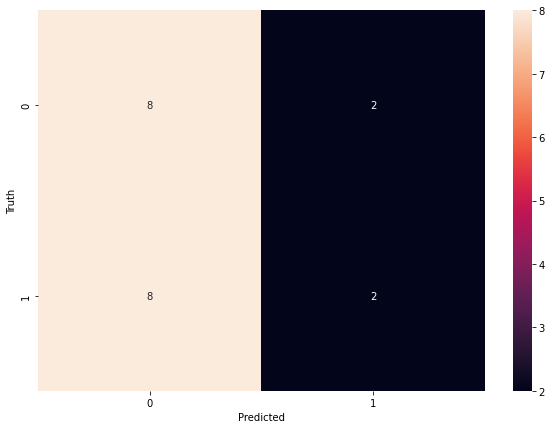

In [128]:
#Visualisation du matrice de confusion
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

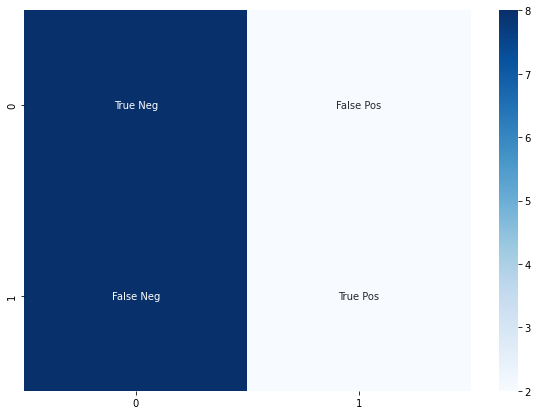

In [129]:
#Interprétation 
plt.figure(figsize = (10, 7))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

8)Refaire la même question mais en utilisant cette fois-ci, une méthode à base de Support Vector Machine.

In [130]:
#Création du modél utilisant la méthode de Support Vector Machine
model_svm = svm.SVC()

In [131]:
#c)Entrainement du modèle et faire de la prédiction:
model_svm.fit(X_train, y_train)
y_pred_SVM = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
#d) Les mesures de performances:
accuracy_SVM = metrics.accuracy_score(y_test, y_pred_svm)
print("La précision du model en utilissant la méthode naive bayésienne est: ",accuracy_SVM)


La précision du model en utilissant la méthode naive bayésienne est:  0.6


In [133]:
#La matrice de confusion:
cm = confusion_matrix(y_test, y_pred_SVM)
cm

array([[8, 2],
       [8, 2]])

Text(69.0, 0.5, 'Truth')

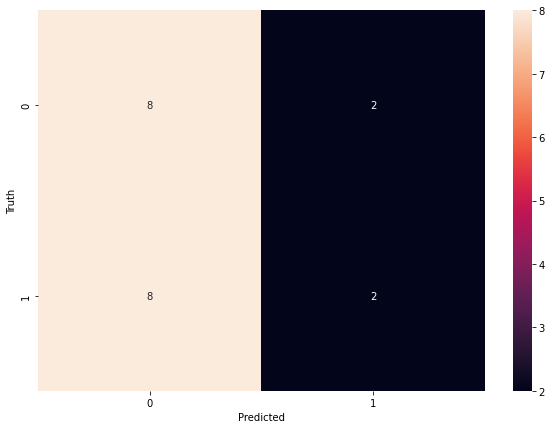

In [134]:
#Visualisation du matrice de confusion
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

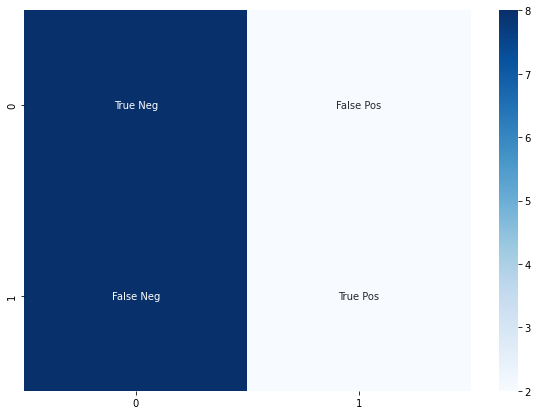

In [135]:
#Interprétation 
plt.figure(figsize = (10, 7))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

9) Ecrire le code qui permet de trouver le meilleur algorithme parmi : Regression Logiqtique, Naive Byésien, Support Vector MAchine (SVC).